In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('Tau Leaping and Gillespie/Gillespie_extrate_t100.csv')
df['Tend'] = 100
df['Dead'] = df['FinalTime'] < 150
df['fila'] = 2

df2 = pd.read_csv('Tau Leaping and Gillespie/Gillespie_extrate_t1000.csv')
df2['Tend'] = 1000
df2['Dead'] = df2['FinalTime'] < 1050
df2['fila'] = 1

df3 = pd.read_csv('Tau Leaping and Gillespie/Gillespie_extrate_t100_boundarytheshold5_gillespie15.csv')
df3['Tend'] = 100
df3['Dead'] = df3['FinalTime'] < 150
df3['fila'] = 3

df = pd.concat([df, df2, df3])

dfext = df.groupby(['SeasonLength','Dead','Tend','fila']).count().reset_index()
dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 10000

dfext = dfext.sort_values(by=['Tend','fila'])
dfext

,SeasonLength,Dead,Tend,fila,Trajectory,FinalTime,ExtRate
0,5.00,False,100,2,9999,9999,0.0001
4,28.75,False,100,2,9959,9959,0.0041
10,52.50,False,100,2,9837,9837,0.0163
14,76.25,False,100,2,9873,9873,0.0127
18,100.00,False,100,2,9950,9950,0.0050
1,5.00,False,100,3,9948,9948,0.0052
5,28.75,False,100,3,8321,8321,0.1679
11,52.50,False,100,3,8501,8501,0.1499
15,76.25,False,100,3,7859,7859,0.2141
19,100.00,False,100,3,7443,7443,0.2557


In [3]:
colordic = {
    1:'dodgerblue',
    2:'pink',
    3:'limegreen',
}

ylimdic = {
    1:500,
    2:40,
    3:600,
}

binsdic = {
    1:20,
    2:3,
    3:3,
}

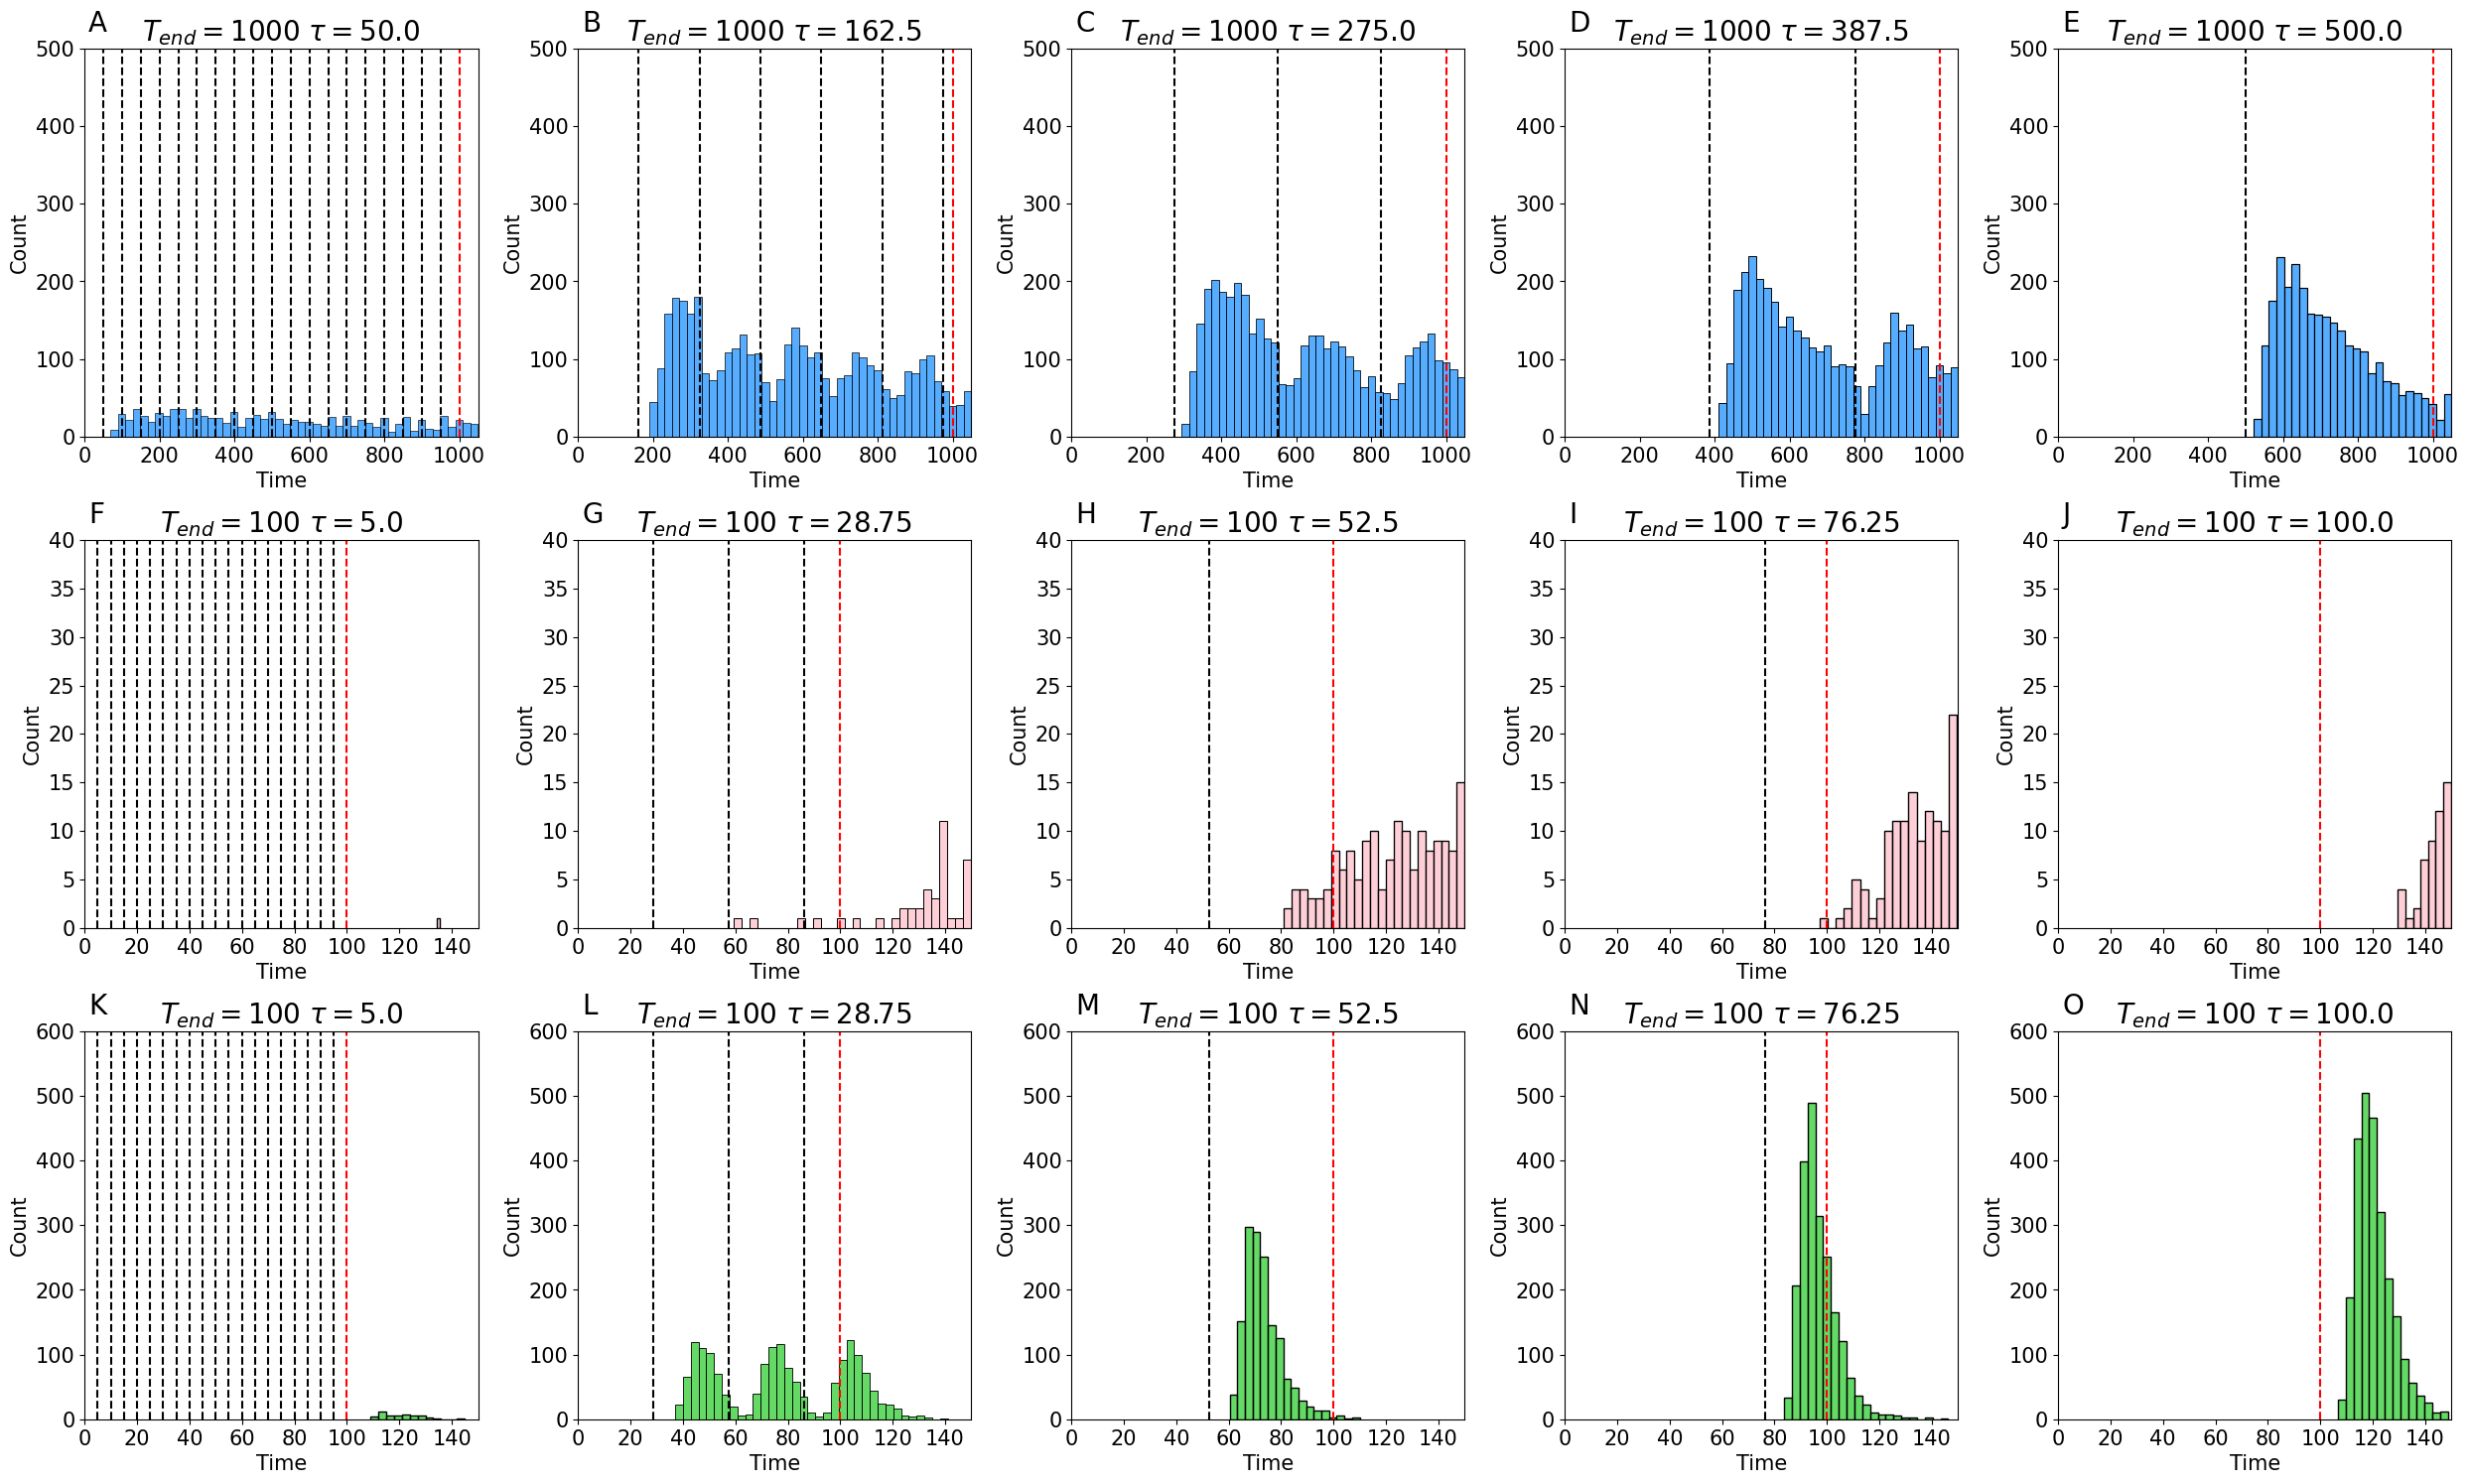

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(25, 15))

i,j,g = 1, 1, 1

for tau, dfaux in df[(df['Dead']==True)].groupby(['SeasonLength','fila','Tend']):
    if tau[1] == 1:
        a = i
    elif tau[1] == 2:
        a = j
    else:
        a = g
    plt.subplot(3,5,(tau[1]-1)*5+a)
    if dfaux.shape[0] >= 1:
        try:
            sns.histplot(data=dfaux, x='FinalTime', color=colordic[tau[1]], binwidth=binsdic[tau[1]])
        except:
            sns.histplot(data=dfaux, x='FinalTime', color=colordic[tau[1]])
    plt.xlim(0,tau[2]+50)
    plt.ylim(0,ylimdic[tau[1]])
    if tau[1] == 1:
        i += 1
    elif tau[1] == 2:
        j += 1
    else:
        g += 1

    k = 1
    while k*tau[0] < tau[2]:
        plt.axvline(k*tau[0], color='black', linestyle='--')
        k += 1
    plt.axvline(tau[2], color='red', linestyle='--')
    plt.title(r'$T_{end}=$'+str(tau[2])+' '+r'$\tau=$'+str(tau[0]),fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('Count',fontsize=15)

"""
for tau, dfaux in df[(df['Dead']==True)&(df['Tend']==100)].groupby('SeasonLength'):
    plt.subplot(3,5,i)
    try:
        sns.histplot(data=dfaux, x='FinalTime',binwidth=5,color='pink')
    except:
        sns.histplot(data=dfaux, x='FinalTime',color='pink')
    plt.xlim(0,155)
    plt.ylim(0,50)
    i += 1

    k = 1
    while k*tau < 100:
        plt.axvline(k*tau, color='black', linestyle='--')
        k += 1
    plt.axvline(100, color='red', linestyle='--')
    plt.title(r'$T_{end}=100$'+' '+r'$\tau=$'+str(tau),fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('Count',fontsize=15)
"""

axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )
    
plt.tight_layout()
#plt.savefig('Figsupp-gillespie.png',dpi=300)
plt.show()

**Extinction histograms for the hybrid method: Tau-leaping and Gillepie's algorithm**
The top row (blue) shows extinction histograms with a total time of $t_{\text{end treatment}}=1000$ and $t_{\text{end}}=1050$ temporal units. As the antibiotic switching interval increases, extinction events become more clearly clustered after switching events (dashed black vertical lines). Dashed red vertical lines indicate $t_{\text{end treatment}}$. The middle row (pink) presents extinction histograms for a shorter total simulation time of $t_{\text{end treatment}}=100$ and $t_{\text{end}}=150$ temporal units, the same temporal scale used in the main text. At this scale, extinction events appear more diffusely distributed, making it difficult to discern their relationship with antibiotic changes. Both (blue and pink) consider extinction when the number of cells in the population is zero and switch between tau-leaping and Gillespie's algortihm with a threshold of 10 cells.
The bottom row (green) shows results from Gillespie's algorithm with a threshold of $0.05/\gamma$ for extinction and $15$ cells for switching between tau-leapping and Gillespie, the total simulation time of $t_{\text{end treatment}}=100$ and $t_{\text{end}}=150$ temporal units. The results are consistent to those observed with tau-leaping, supporting the strategy used throughout the main text.